# Extra - Hardcoding Evaluation Metrics 
---

__Author Name : Shreyansh Padarha__<br>
__Email : mailto:shreyansh.padarha@hotmail.com__

---

># Introduction

This notebook, is a short implementation (from scratch) of the evaluation metrics listed below. It involves creating user defined functions for creating the following for a ```binary classification problem```, when y_pred and y_test is given -

- Confusion Matrix
- Accuracy Score
- Precision
- Recall
- F1 Score

---
> # Approach / Method

The simple approach I used was, to create a Class named ```evaluation_metrics``` which has all the different evaluation metrics within it.  
__All the methods and process are elaboratively mentioned via comments__

---
> # Observations 

The created user defined methods within the class return the same values as sklearn's metrics methods.

> # Learnings

This lab made by concepts on recall, tradeoff f1 score, roc and auc absolutely crystal clear. It was important as i had missed the theory classes for the same.

---
> # References

### <center> Theory <center> 

__Fig 1__<br> 
Yuexiong Ding, City University Of HK, Analyzing the Leading Causes of Traffic Fatalities Using XGBoost and Grid-Based Analysis: A City Management Perspective
  
__Fig 2__<br> 
Anuganti Suresh, Medium : https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5
    
__Fig 3__<br> 
Sarang Narkhede, Medium, Understanding AUC - ROC Curve : https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
    

### <center> Coding <center> 
__Heart Disease Dataset__<br>
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset<br>

1. Matplot Library Documnentaion: https://matplotlib.org/
2. StackOverflow: https://stackoverflow.com/ 
3. sklearn: https://scikit-learn.org/stable/

---   
> # Completion Status:

| Question | Status |
| --- | --- |
| Confusion Matrix | __Completed__ |
| Accuracy Score | __Completed__ |
| Precision| __Completed__ |
| Recall| __Completed__ |
| F1 Score | __Completed__ |

> # Theory

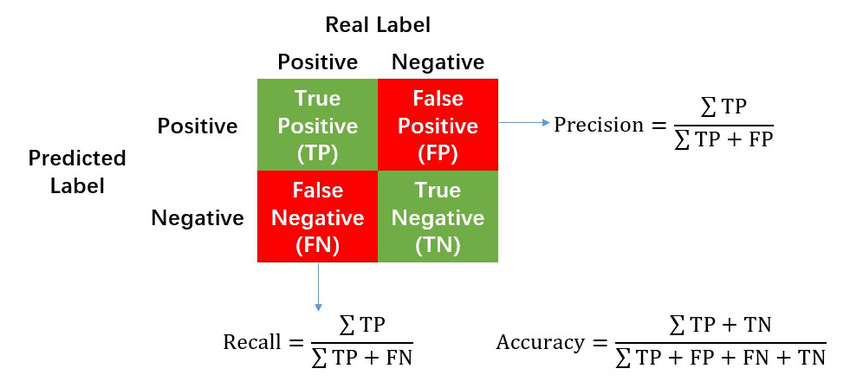

## Precision:
Precision is the proportion of true positive predictions over the total number of positive predictions made.<br>
__Precision = TP / (TP + FP)__

## Recall:
Recall is the proportion of true positive predictions over the total number of actual positive examples.<br>
__Recall = TP / (TP + FN)__

## F1 Score:
The F1 score is a weighted average of precision and recall. It provides a single measure of a classifier's performance that takes into account both precision and recall.<br>
__F1 Score = 2 * (Precision * Recall) / (Precision + Recall)__

## Confusion Matrix

A confusion matrix is a table or visual represntaion that summarizes the classification performance of a ML model on a set of test data. The matrix is used to evaluate the performance of a classification alogrith. It does this by calculating the number of __true positive__, __true negative__, __false positive__ and __false negative__. 

Here's a breif about the afermentioned terms:

1. __True Positive (TP)__: The number of positive instances/values that are correctly predicted as positive.
2. __False Positive (FP)__: The number of negative instances/values that are incorrectly predicted as positive.
3. __True Negative (TN)__: The number of negative instances/values that are correctly predicted as negative.
4. __False Negative (FN)__: The number of positive instances/values that are incorrectly predicted as negative.

__Visual Representation of a Confusion Matrix__

|   | __Predicted Positive__ | __Predicted Negative__ |
| --- | --- | --- |
|__Actual Positive__| True Positive (TP) | False Positive(FP) |
|__Actual Negative__| False Positve (FP) | True Negative(TN) |

<br><center>**Confusion Matrix**<center>

---


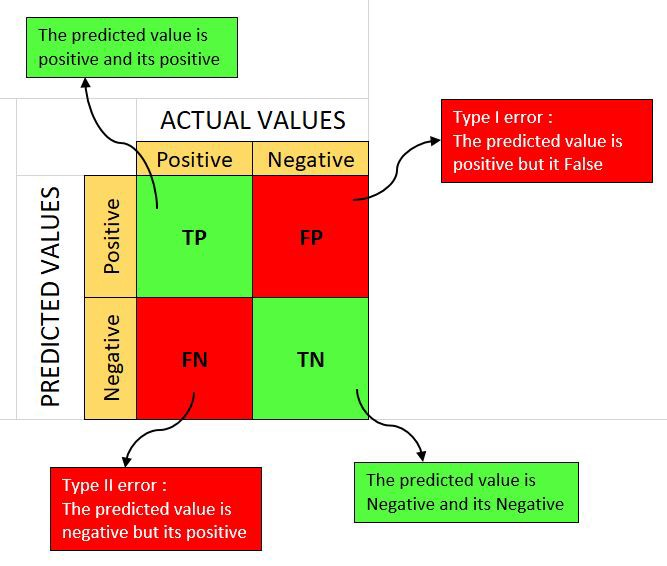
    
<br><center>**fig2.**<center>

## Plotting points on an AUC Curve:
The AUC (Area Under the Curve) curve is a graphical representation of the performance of a binary classification model. It shows the trade-off between sensitivity (recall) and specificity (1 - false positive rate) for different classification thresholds.<br>
To plot points on an AUC curve, you need to calculate the __false positive rate (FPR)__ and __true positive rate (TPR)__ for different classification thresholds.<br>

__Steps Involved__

1. The FPR is calculated as FP / (FP + TN).<br> 
2. The TPR ism calculated as TP / (TP + FN).<br>
3. Then, you can plot the TPR on the y-axis and the FPR on the x-axis for different classification thresholds. 
4. The AUC is the area under the curve.<br>

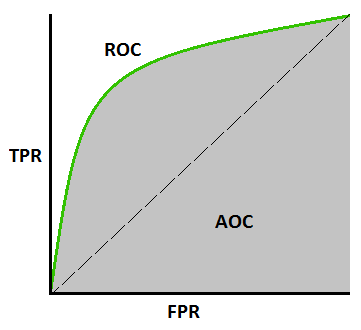

### Importing required Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### User-defined Functions

In [2]:
#User-defined function to count the number of unique elements in an array
def unique_count(arr):
    store = {}
    for x in set(y_pred):
        count = 0
        for ele in y_pred:
            if x== ele:
                count +=1
        store[x] = count
    
    return store

In [3]:
#User defined function for displaying a confusion matrix
def cfmx_disp(conf_matrix):
    plt.figure(figsize = (12,10))

    x_axis_labels = ["Predicted Positive","Predicted Negative"] # labels for x-axis
    y_axis_labels = ["Actual Positive", "Actual Negative"] # labels for y-axis

    # create seabvorn heatmap with required labels
    sns.heatmap(conf_matrix,
                xticklabels=x_axis_labels, yticklabels=y_axis_labels,
               vmax=100, square=True, cmap="crest", linewidths=10,
                annot=True, annot_kws={"fontsize":20}, fmt='g')

    plt.title("Confusion Matrix",color="Purple",fontsize=30)

    return plt.show()

# Creating a class of functinos for evlauation metrics

In [4]:
class evaluation_metrics:
    def __init__(self, y_true, y_pred, pos, neg):
        self.y_true = y_true
        self.y_pred = y_pred
        self.pos = pos
        self.neg = neg
    
        self.tp, self.tn, self.fp, self.fn = 0, 0, 0, 0
    
    #User Defined function to create a confusion matrix for binary clasification
    def confusion_matrix_binclf(self):

        for i in range(0,len(self.y_pred)):
            act_value = self.y_true[i]
            pred_value = self.y_pred[i]

            if pred_value==self.pos:
                if act_value==pos:
                    self.tp += 1
                else:
                    self.fp += 1

            if pred_value==neg:
                if act_value==neg:
                    self.tn += 1
                else:
                    self.fn += 1

        final_res = {"True Positive" : self.tp,
                     "False Positive" : self.fp,
                     "False Negative" : self.fn,
                    "True Negative" : self.tn}

        return final_res 
    
    #User defined function to display the confusion matrix
    def confusion_matrix_disp(self):
        run = self.confusion_matrix_binclf()
        plt.figure(figsize = (12,10))
        
        conf_matrix = [[self.tp,self.fp],
                [self.fn,self.tn]]
        
        x_axis_labels = ["Predicted Positive","Predicted Negative"] # labels for x-axis
        y_axis_labels = ["Actual Positive", "Actual Negative"] # labels for y-axis

        # create seabvorn heatmap with required labels
        sns.heatmap(conf_matrix,
                    xticklabels=x_axis_labels, yticklabels=y_axis_labels,
                   vmax=100, square=True, cmap="crest", linewidths=10,
                    annot=True, annot_kws={"fontsize":20}, fmt='g')

        plt.title("Confusion Matrix",color="Purple",fontsize=30)

        return plt.show()
    
    #User defined function to calculate the accuracy score 
    def acc_score(self):
        correct_predictions = 0
        for i in range(len(self.y_pred)):
            if self.y_true[i] == self.y_pred[i]:
                correct_predictions+=1
                
        return correct_predictions/len(self.y_pred)
    
    #User defined function to calculate the Precision 
    def calc_precision(self):
        precision = self.tp / (self.tp + self.fp)
        return precision
        
    #User defined function to calculate the Recall
    def calc_recall(self):
        recall = self.tp / (self.tp + self.fn)
        return recall
    
    #User defined function to calculate the f1 score
    def calc_f1_score(self):
        precision = self.calc_precision()
        recall = self.calc_recall()
        f1_score = 2*(precision*recall)/(precision+recall)
        return f1_score
    
    #User defined function to plot area under the ROC curve
    def calc_auc_curve(self):
        plt.figure(figsize = (12,10))
        FPR = self.fp / (self.fp + self.tn)
        print("FPR: ", FPR)
        TPR = self.tp / (self.tp + self.fn)
        print("TPR: ", TPR)
        sns.lineplot([FPR],[TPR],color="black")
        plt.show()
        return FPR, TPR

# Testing created metric methods of evaluation_metrics class

#### Importing the heart disease dataset

In [5]:
#Heart Disease Binary Classification Dataset
#Dataset Link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
df = pd.read_csv("heart.csv")

#Converting 0's and 1s to No Disease and Disease
df['target'] = ["Disease" if x==0 else "No Disease" for x in df['target']]

df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
307,44,1,1,120,220,0,1,170,0,0.0,2,0,2,No Disease
549,68,1,2,118,277,0,1,151,0,1.0,2,1,3,No Disease
817,45,1,0,115,260,0,0,185,0,0.0,2,0,2,No Disease
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,No Disease
278,55,1,0,160,289,0,0,145,1,0.8,1,1,3,Disease


#### Performing logistic regression

In [6]:
#Defining or slecting the subset from the dataset as X (independent variables) and Y(dependent variable)
X = df.iloc[:, 0:13].values.tolist()
y = df.target.to_list()

#Creating a 65:35 train:test split for running logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

#LOGISTIC REGRESSION On Heart Disease datasete
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)

#Predicting and storing the predictions as Y_pred and actual values as Y_actual 
y_true = y_test
y_pred = clf.predict(X_test)

pos = "Disease"
neg = "No Disease"

## Initialising the class instance

In [7]:
predictor = evaluation_metrics(y_true, y_pred, pos, neg)

## Confusion Matrix

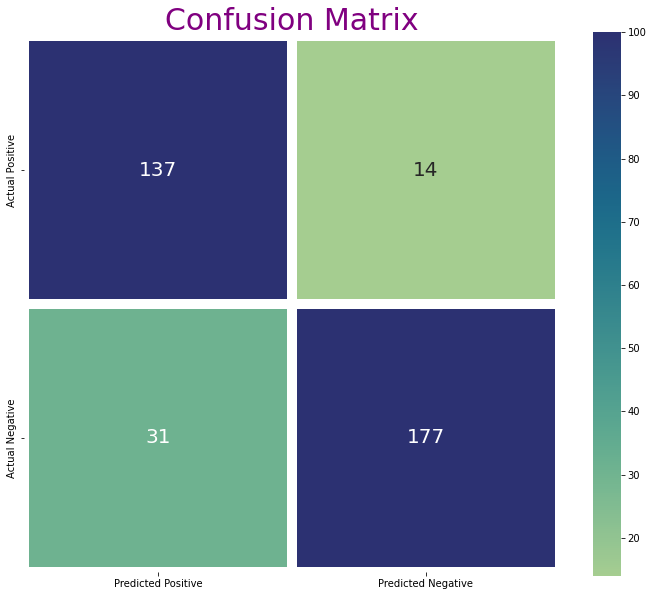

In [8]:
#Using evaluation metric's method to generate the confusion matrix
predictor.confusion_matrix_disp()

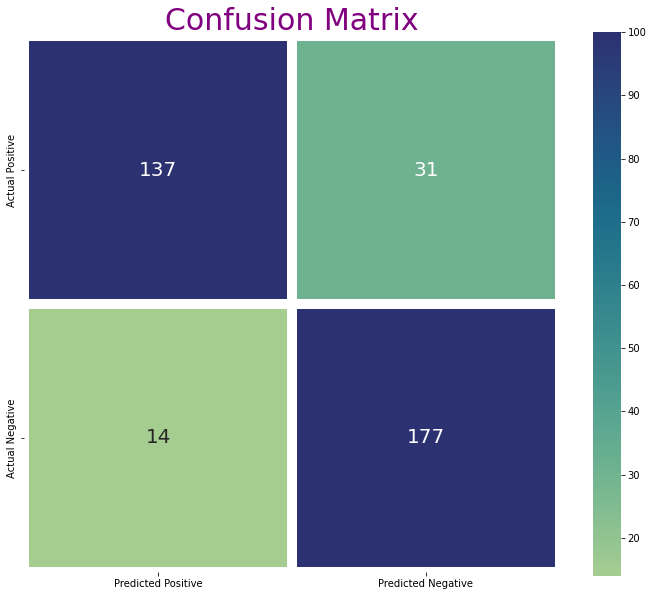

In [9]:
#Using "sklearn.metrics library's confusion_matrix" to generate the values
conf_arr = confusion_matrix(y_true, y_pred,
                labels=["Disease","No Disease"])

cfmx_disp(conf_arr)

## Accuracy Score

In [10]:
# Using "Class Method" to predict the accuracy score
accu = predictor.acc_score()
accu

0.8746518105849582

In [11]:
#Using "sklearn.metrics library's method accuracy_score" to generate an accuracy score
sk_accu = accuracy_score(y_true,y_pred)

In [12]:
accu == sk_accu

True

### Precision

In [13]:
# Using "Class Method" to predict the precision score
precision_score_ = predictor.calc_precision()
precision_score_

0.9072847682119205

In [14]:
#Using "sklearn.metrics library's method precision_score"
sk_precision_score = precision_score(y_true, y_pred, average="binary", pos_label="Disease")
sk_precision_score

0.9072847682119205

In [15]:
precision_score_ == sk_precision_score

True

### Recall

In [16]:
# Using "Class Method" to predict the recall score
recall_score_ = predictor.calc_recall()
recall_score_

0.8154761904761905

In [17]:
#Using "sklearn.metrics library's method recall_score"
sk_recall_score = recall_score(y_true,y_pred,average="binary", pos_label="Disease")
sk_recall_score

0.8154761904761905

In [18]:
recall_score_ == sk_recall_score

True

## F1 Score

In [19]:
# Using "Class Method" to predict the f1 score
f1_score_ = predictor.calc_f1_score()

In [20]:
#Using "sklearn.metrics library's method f1_score"
sk_f1_score = f1_score(y_true,y_pred,average="binary", pos_label="Disease")
sk_f1_score

0.8589341692789969

In [21]:
f1_score_ == sk_f1_score

True

## AUC

FPR:  0.07329842931937172
TPR:  0.8154761904761905


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


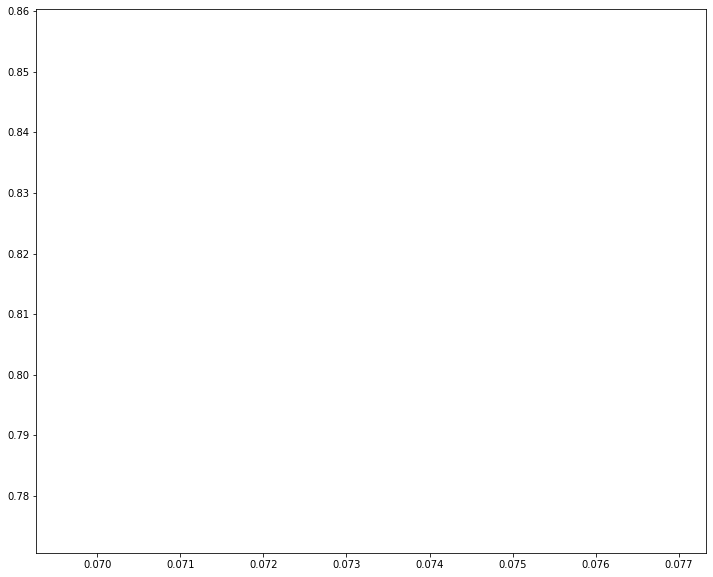

In [22]:
fpr, tpr = predictor.calc_auc_curve()

__Note__<br>
Due to time constraint, unable to plot the FPR and TPR values, some glitch occuring for the same.